# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
# Reading the dataset
breast_cancer_data = pd.read_csv("breast-cancer-wisconsin-data.csv")
breast_cancer_data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
# Datatypes of all columns with some additional information required for descriptive analysis
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
# Shape of the data
breast_cancer_data.shape

(699, 11)

In [6]:
# Descriptive Analysis:
# All the columns are of type int, except the 'Bare Nuclei' column.
# The columnn 'Bare Nuclei' is of object type but going through the data, we conclude that their are missing values marked with '?'.
# Hence, these missing values need to be treated.
# Also, all the values are scaled ranging from 1 to 10.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [8]:
# Checking null value's presence
breast_cancer_data.isnull().values.any()

False

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [10]:
# Checking which entries are non numeric

temp = pd.DataFrame(breast_cancer_data['Bare Nuclei'].str.isdigit()) 
temp[temp['Bare Nuclei'] == False]

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [12]:
breast_cancer_data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [13]:
# The mode of the column 'Bare Nuclei' is 1.

In [14]:
# First, replacing the non numeric (?) entries with the mode of the 'Bare Nuclei' column
breast_cancer_data = breast_cancer_data.replace('?', 1)

# Second, changing the datatype of 'Bare Nuclei' column from object to int
breast_cancer_data['Bare Nuclei'] = breast_cancer_data['Bare Nuclei'].astype('int64')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [15]:
# Check for correlation of variable

In [16]:
breast_cancer_data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [17]:
# Cell size shows high significance with cell shape, marginal adhesion, single epithelial cell size, bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [18]:
#Let us check for pair plots

In [19]:
# Importing the necessary packages and enable plotting of graphs in Jupyter notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for styling the graph with grid
plt.style.use('ggplot')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


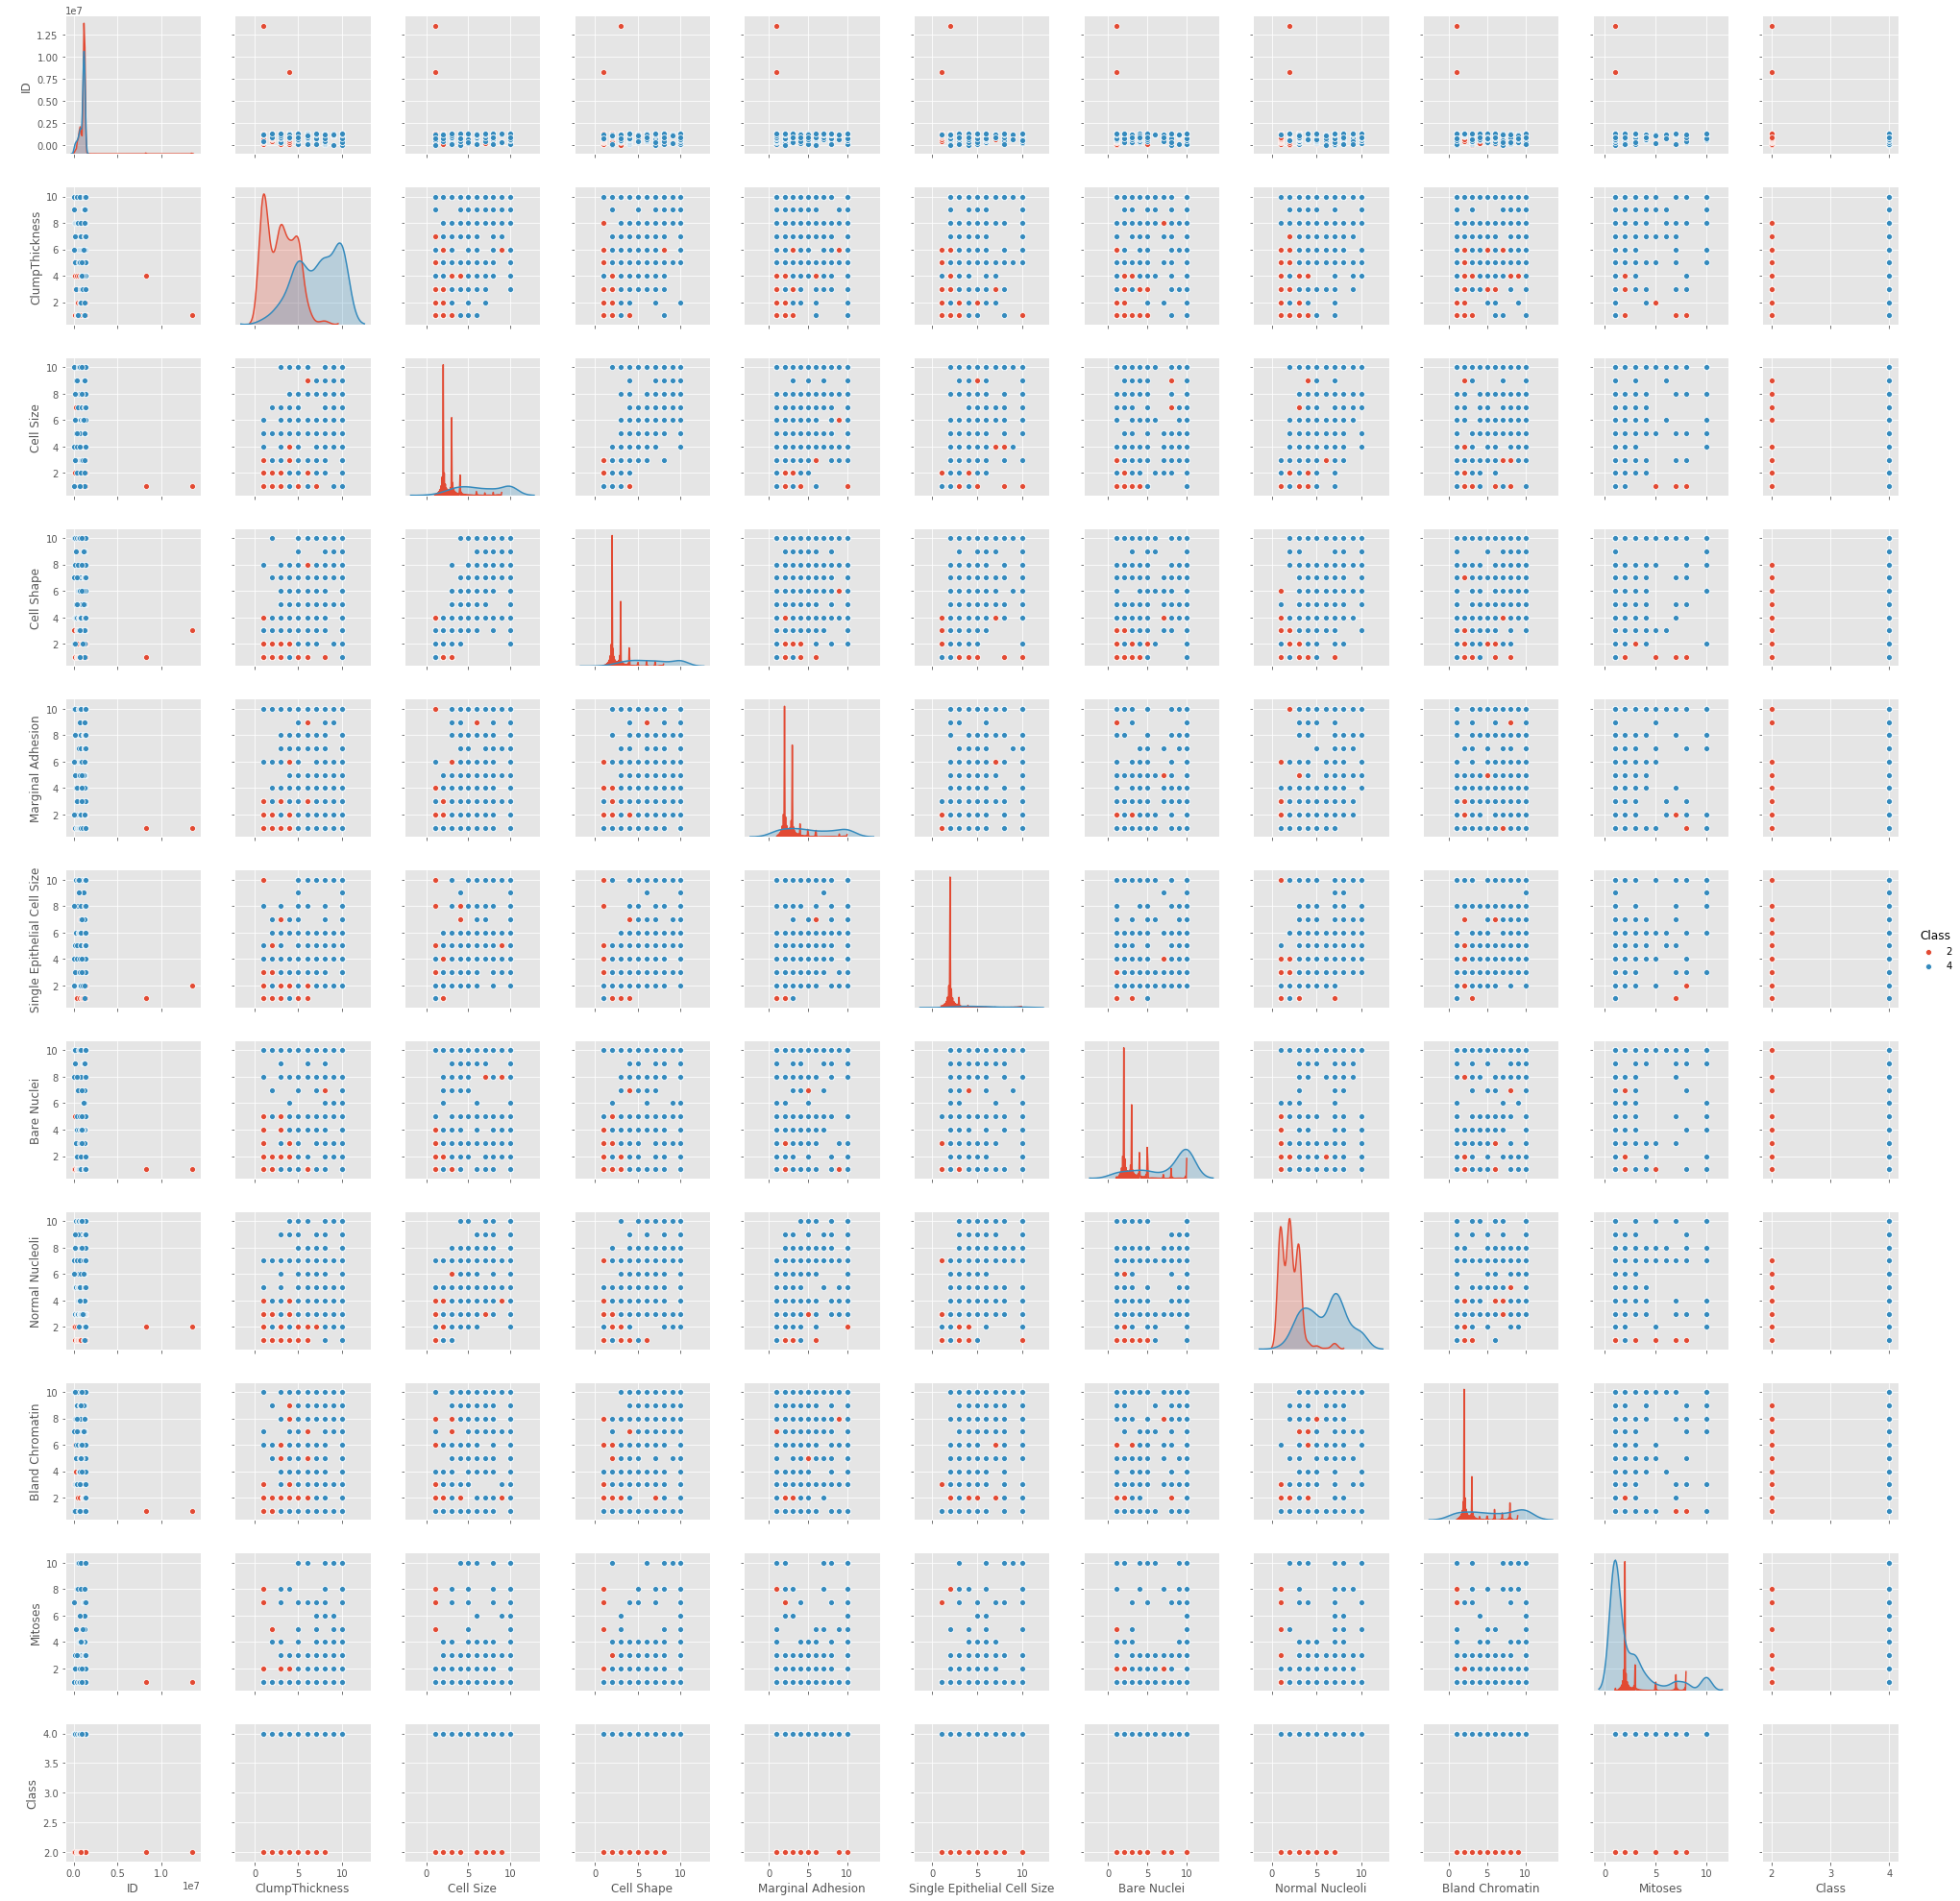

In [20]:
# Creating pairplot
sns.pairplot(breast_cancer_data, hue = 'Class', diag_kind = 'kde')

In [21]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [22]:
#Removing 'ID' column as it is not needed.
breast_cancer_data = breast_cancer_data.drop('ID', axis = 1)

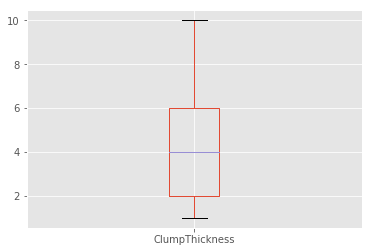

In [23]:
breast_cancer_data.boxplot(column = 'ClumpThickness')

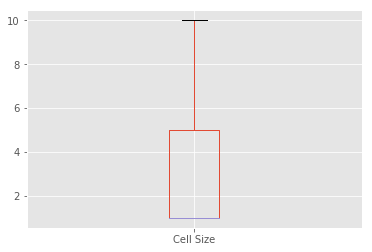

In [24]:
breast_cancer_data.boxplot(column = 'Cell Size')

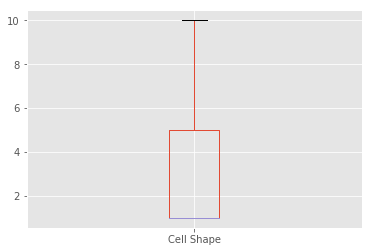

In [25]:
breast_cancer_data.boxplot(column = 'Cell Shape')

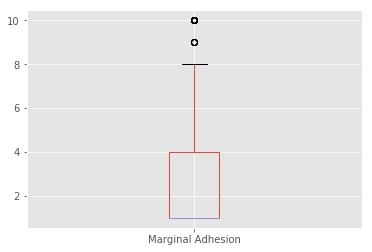

In [26]:
breast_cancer_data.boxplot(column = 'Marginal Adhesion')

In [27]:
pd.crosstab(breast_cancer_data['Marginal Adhesion'], breast_cancer_data['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [28]:
breast_cancer_data['Marginal Adhesion'][breast_cancer_data['Marginal Adhesion'] > 4] = 4
breast_cancer_data['Marginal Adhesion'].value_counts()

1    407
4    176
3     58
2     58
Name: Marginal Adhesion, dtype: int64

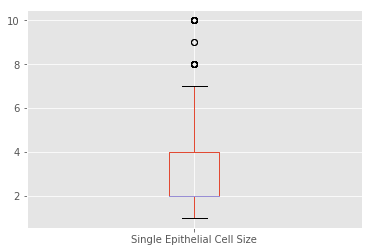

In [29]:
breast_cancer_data.boxplot(column = 'Single Epithelial Cell Size')

In [30]:
pd.crosstab(breast_cancer_data['Single Epithelial Cell Size'], breast_cancer_data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [31]:
breast_cancer_data['Single Epithelial Cell Size'][breast_cancer_data['Single Epithelial Cell Size'] > 6] = 6
breast_cancer_data['Single Epithelial Cell Size'].value_counts()

2    386
6    107
3     72
4     48
1     47
5     39
Name: Single Epithelial Cell Size, dtype: int64

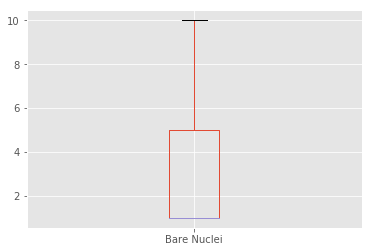

In [32]:
breast_cancer_data.boxplot(column = 'Bare Nuclei')

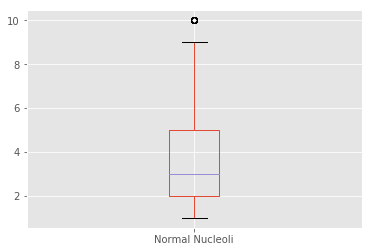

In [33]:
breast_cancer_data.boxplot(column = 'Normal Nucleoli')

In [34]:
pd.crosstab(breast_cancer_data['Normal Nucleoli'], breast_cancer_data['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


In [35]:
breast_cancer_data['Normal Nucleoli'][breast_cancer_data['Normal Nucleoli'] > 7] = 7
breast_cancer_data['Normal Nucleoli'].value_counts()

2    166
3    165
1    152
7    132
4     40
5     34
6     10
Name: Normal Nucleoli, dtype: int64

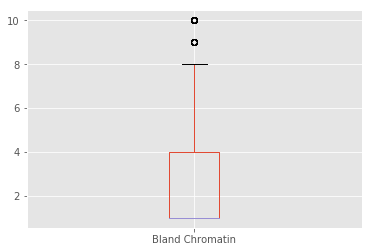

In [36]:
breast_cancer_data.boxplot(column = 'Bland Chromatin')

In [37]:
pd.crosstab(breast_cancer_data['Bland Chromatin'], breast_cancer_data['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [38]:
breast_cancer_data['Bland Chromatin'][breast_cancer_data['Bland Chromatin'] > 6] = 6
breast_cancer_data['Bland Chromatin'].value_counts()

1    443
6    139
3     44
2     36
5     19
4     18
Name: Bland Chromatin, dtype: int64

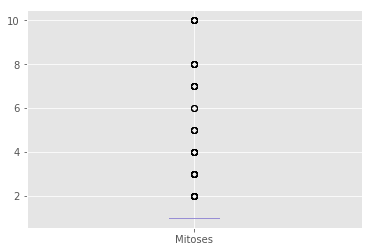

In [39]:
breast_cancer_data.boxplot(column = 'Mitoses')

In [40]:
pd.crosstab(breast_cancer_data['Mitoses'], breast_cancer_data['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [41]:
breast_cancer_data['Mitoses'][breast_cancer_data['Mitoses'] > 4] = 4
breast_cancer_data['Mitoses'].value_counts()

1    579
4     52
2     35
3     33
Name: Mitoses, dtype: int64

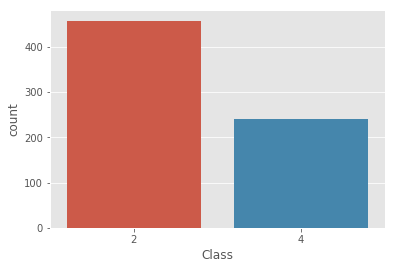

In [42]:
sns.countplot(breast_cancer_data['Class'])

In [43]:
# Dropping the 'Class' column
breast_cancer_data = breast_cancer_data.drop(['Class'], axis = 1)

In [44]:
# Doubt: Since the dimensions of the data are already scaled, why do we need to standardize it?

from scipy.stats import zscore
breast_cancer_data_z = breast_cancer_data.apply(zscore)

# Q6 Create a covariance matrix for identifying Principal components

In [45]:
# PCA
# Step 1 - Create covariance matrix

breast_cancer_data_z_matrix = np.cov(breast_cancer_data_z.T)
print('Covariance Matrix \n%s', breast_cancer_data_z_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.55151351 0.56413691 0.5908535
  0.57283842 0.55851382 0.40800705]
 [0.64583645 1.00143266 0.90818117 0.71521785 0.79059498 0.68765657
  0.74365474 0.73000983 0.50781935]
 [0.65552689 0.90818117 1.00143266 0.69734899 0.76233939 0.70848734
  0.72819623 0.72399376 0.47875736]
 [0.55151351 0.71521785 0.69734899 1.00143266 0.66305424 0.69254131
  0.67902622 0.64954604 0.41561735]
 [0.56413691 0.79059498 0.76233939 0.66305424 1.00143266 0.64866184
  0.6693079  0.70201331 0.49588022]
 [0.5908535  0.68765657 0.70848734 0.69254131 0.64866184 1.00143266
  0.6955454  0.62441909 0.43528712]
 [0.57283842 0.74365474 0.72819623 0.67902622 0.6693079  0.6955454
  1.00143266 0.68517279 0.40475859]
 [0.55851382 0.73000983 0.72399376 0.64954604 0.70201331 0.62441909
  0.68517279 1.00143266 0.47329051]
 [0.40800705 0.50781935 0.47875736 0.41561735 0.49588022 0.43528712
  0.40475859 0.47329051 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [46]:
# Step 2- Get eigen values and eigen vector

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(breast_cancer_data_z_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30250309  0.04026201 -0.01162211  0.91362629  0.08042328 -0.16033906
  -0.1145078   0.16310172  0.01149127]
 [-0.3719932   0.04126095 -0.73353713 -0.05427847  0.30835639  0.29778331
   0.28847182 -0.11882188  0.19442872]
 [-0.36862077  0.08286764  0.6657287   0.0029881   0.28675806  0.45837539
   0.28510656 -0.17145443  0.10501188]
 [-0.33406759  0.17799949  0.04470417 -0.1852252  -0.44724636 -0.01745015
   0.19629769  0.69652205  0.31048128]
 [-0.34709977 -0.03136306  0.0755046  -0.22546013  0.3308719  -0.69464167
   0.3230091   0.03787304 -0.35246615]
 [-0.33453139  0.14411005 -0.08286452  0.04210423 -0.6123051   0.16275534
   0.08552343 -0.33486952 -0.58122548]
 [-0.34115636  0.21834689  0.05095053 -0.13813378 -0.15548511 -0.34199663
  -0.401876   -0.48777888  0.5231541 ]
 [-0.33829759  0.00124437 -0.02176235 -0.2367856   0.27255606  0.22153052
  -0.71429912  0.30174025 -0.32307768]
 [-0.24373774 -0.94270747  0.03095176 -0.01643616 -0.18257263  0.01225422
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [48]:
total = sum(eigenvalues)
var_exp = [( i /total ) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Variance: ", var_exp)
print("\nCumulative Variance: ", cum_var_exp)

Variance:  [0.6772067927924106, 0.07731174020275779, 0.055776796936165794, 0.04765630928227001, 0.03732568575005333, 0.03527518993555755, 0.03172569080763572, 0.02787704435896451, 0.009844749934184705]

Cumulative Variance:  [0.67720679 0.75451853 0.81029533 0.85795164 0.89527732 0.93055251
 0.96227821 0.99015525 1.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [49]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()
Principal_Components = pca.fit_transform(breast_cancer_data_z)
print("Principal Components: ", pca.components_)

Principal Components:  [[ 0.30250309  0.3719932   0.36862077  0.33406759  0.34709977  0.33453139
   0.34115636  0.33829759  0.24373774]
 [-0.04026201 -0.04126095 -0.08286764 -0.17799949  0.03136306 -0.14411005
  -0.21834689 -0.00124437  0.94270747]
 [ 0.91362629 -0.05427847  0.0029881  -0.1852252  -0.22546013  0.04210423
  -0.13813378 -0.2367856  -0.01643616]
 [ 0.08042328  0.30835639  0.28675806 -0.44724636  0.3308719  -0.6123051
  -0.15548511  0.27255606 -0.18257263]
 [ 0.1145078  -0.28847182 -0.28510656 -0.19629769 -0.3230091  -0.08552343
   0.401876    0.71429912  0.02183465]
 [-0.16310172  0.11882188  0.17145443 -0.69652205 -0.03787304  0.33486952
   0.48777888 -0.30174025  0.04682126]
 [-0.01149127 -0.19442872 -0.10501188 -0.31048128  0.35246615  0.58122548
  -0.5231541   0.32307768 -0.12047597]
 [ 0.16033906 -0.29778331 -0.45837539  0.01745015  0.69464167 -0.16275534
   0.34199663 -0.22153052 -0.01225422]
 [ 0.01162211  0.73353713 -0.6657287  -0.04470417 -0.0755046   0.08286452


# Q10 Find correlation between components and features

In [52]:
dfa_pca = pd.DataFrame(pca.components_, columns = breast_cancer_data_z.columns)

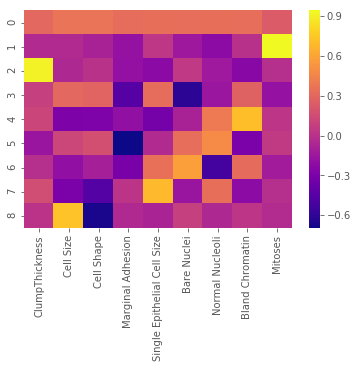

In [53]:
sns.heatmap(dfa_pca, cmap = 'plasma')

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [54]:
#Reading the dataset
jokes_df = pd.read_csv("jokes.csv")
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [55]:
ratings = jokes_df.iloc[0:200,1:]
ratings.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [56]:
ratings.columns = np.arange(0, 100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [57]:
ratings = ratings.replace(99.00, 0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [59]:
ratings_diff_df = pd.DataFrame(ratings_diff)
mean_ratings = ratings_diff_df.mean(axis=0)
mean_ratings

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

In [60]:
print("First 10 sorted values:\n", np.argsort(mean_ratings, axis = 1)[0:10])

First 10 sorted values:
 0    84
1    15
2    31
3     1
4    71
5    11
6    86
7    34
8    93
9    79
dtype: int64
